In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('C:\\Users\\intern-mrithubashini\\Pictures\\master_sheet_HCV.xlsx',sheet_name = "Station",index_col='Date',parse_dates=True)
df.index.freq='M'

In [3]:
df.tail()

,CPI: Housing: Base year 2012,CPI: Core CPI index (excluding food group and fuel group): Base year 2012,CPI: Food and beverages: Base year 2012,CPI: Fuel & light: Base year 2012,CPI: Urban: Base year 2012,CPI: Rural: Base year 2012,IIP: Infrastructure/ construction goods: Base year 2011-12,Closing value of index: S & P B S E Sensex,WPI: Base year 2011-12,Repo_Rate,rainfall_all,HCV_newdeliquency%
Date,,,,,,,,,,,,
2023-11-30,177.9,182.8,192.6,179.9,184.2,188.2,164.2,66988.44,153.1,6.5,34.6,0.087835
2023-12-31,176.9,182.9,191.2,180.2,183.6,187.6,180.3,72240.26,151.8,6.5,25.5,0.084663
2024-01-31,177.6,183.4,190.1,180.9,183.5,187.3,186.7,71752.11,151.2,6.5,7.2,0.084056
2024-02-29,178.5,183.9,190.3,180.7,184.0,187.4,179.8,72500.30,151.2,6.5,19.7,0.078919
2024-03-31,178.2,184.2,190.7,175.8,183.6,187.8,194.2,73651.35,151.8,6.5,28.5,0.060887


In [4]:
df.columns

Index(['CPI: Housing: Base year 2012',
       'CPI: Core CPI index (excluding food group and fuel group): Base year 2012',
       'CPI: Food and beverages: Base year 2012',
       'CPI: Fuel & light: Base year 2012', 'CPI: Urban: Base year 2012',
       'CPI: Rural: Base year 2012',
       'IIP: Infrastructure/ construction goods: Base year 2011-12',
       'Closing value of index: S & P B S E Sensex', 'WPI: Base year 2011-12',
       'Repo_Rate', 'rainfall_all', 'HCV_newdeliquency%'],
      dtype='object')

In [5]:
len(df.columns)

12

In [6]:
# Check for NaN and infinite values
print(df[['CPI: Housing: Base year 2012',
       'CPI: Core CPI index (excluding food group and fuel group): Base year 2012',
       'CPI: Food and beverages: Base year 2012',
       'CPI: Fuel & light: Base year 2012', 'CPI: Urban: Base year 2012',
       'CPI: Rural: Base year 2012',
       'IIP: Infrastructure/ construction goods: Base year 2011-12',
       'Closing value of index: S & P B S E Sensex', 'WPI: Base year 2011-12',
       'Repo_Rate', 'rainfall_all', 'HCV_newdeliquency%']].isnull().sum())  # Check for NaN values
print(df[['CPI: Housing: Base year 2012',
       'CPI: Core CPI index (excluding food group and fuel group): Base year 2012',
       'CPI: Food and beverages: Base year 2012',
       'CPI: Fuel & light: Base year 2012', 'CPI: Urban: Base year 2012',
       'CPI: Rural: Base year 2012',
       'IIP: Infrastructure/ construction goods: Base year 2011-12',
       'Closing value of index: S & P B S E Sensex', 'WPI: Base year 2011-12',
       'Repo_Rate', 'rainfall_all', 'HCV_newdeliquency%']].isin([np.inf, -np.inf]).sum())  # Check for infinite values


CPI: Housing: Base year 2012                                                 0
CPI: Core CPI index (excluding food group and fuel group): Base year 2012    0
CPI: Food and beverages: Base year 2012                                      0
CPI: Fuel & light: Base year 2012                                            0
CPI: Urban: Base year 2012                                                   0
CPI: Rural: Base year 2012                                                   0
IIP: Infrastructure/ construction goods: Base year 2011-12                   0
Closing value of index: S & P B S E Sensex                                   0
WPI: Base year 2011-12                                                       0
Repo_Rate                                                                    0
rainfall_all                                                                 0
HCV_newdeliquency%                                                           0
dtype: int64
CPI: Housing: Base year 2012           

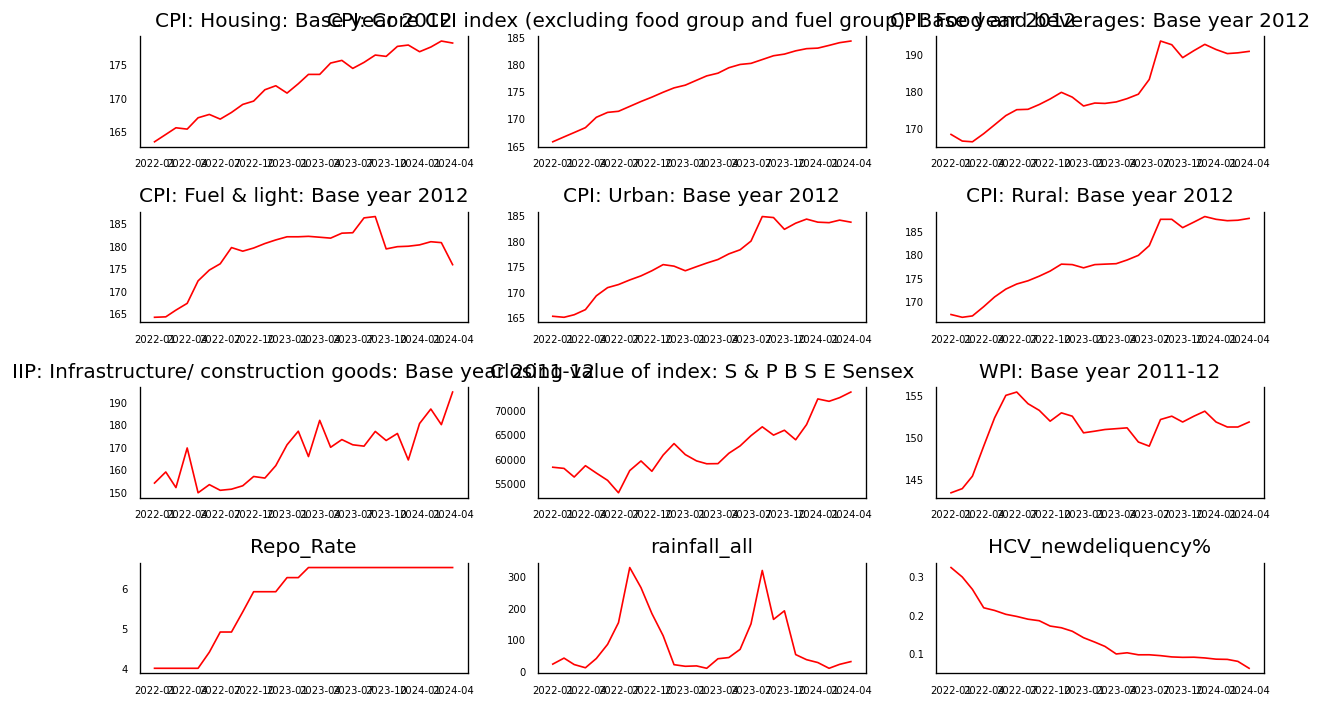

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [8]:
# Separate predictors (X) and target (Y)
X = df[['CPI: Housing: Base year 2012',
       'CPI: Core CPI index (excluding food group and fuel group): Base year 2012',
       'CPI: Food and beverages: Base year 2012',
       'CPI: Fuel & light: Base year 2012', 'CPI: Urban: Base year 2012',
       'CPI: Rural: Base year 2012',
       'IIP: Infrastructure/ construction goods: Base year 2011-12',
       'Closing value of index: S & P B S E Sensex', 'WPI: Base year 2011-12',
       'Repo_Rate', 'rainfall_all']]  # Adjust columns based on your data
Y = df['HCV_newdeliquency%']  # Adjust 'Y' to your target variable

# Add constant to X (for intercept)
X = sm.add_constant(X)

In [9]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     HCV_newdeliquency%   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.75e-13
Time:                        18:13:34   Log-Likelihood:                 98.116
No. Observations:                  28   AIC:                            -172.2
Df Residuals:                      16   BIC:                            -156.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [10]:
# Fit robust regression model (Theil-Sen)
theil_sen = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())  # Using Tukey's biweight function for robustness
theil_sen_results = theil_sen.fit()
print(theil_sen_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:     HCV_newdeliquency%   No. Observations:                   28
Model:                            RLM   Df Residuals:                       16
Method:                          IRLS   Df Model:                           11
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 08 Jul 2024                                         
Time:                        18:13:34                                         
No. Iterations:                     2                                         
                                                                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------